In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
uc_data = pd.read_csv("uc.csv")
uc_data.sample(10)

,service,subservice_name,subservice_charge,city_name,country_name,source
6501,plumbers,Western toilet installation (floor mounted),['₹1499'],ranchi,India,UrbanCompany
4257,electricians,Decorative Lights Installation (per 10m),['₹199'],vijayawada,India,UrbanCompany
6619,microwave_repair,Fuse 5 / 15 Amp,"['₹59', '₹299 (Labour)']",prayagraj,India,UrbanCompany
7132,ac_service_repair,Replace LVT,"['₹900', '₹499 (Labour)']",kota,India,UrbanCompany
7092,plumbers,Tap replacement,['₹119'],gwalior,India,UrbanCompany
5216,microwave_repair,Convection Heater,"['₹860', '₹299 (Labour)']",raipur,India,UrbanCompany
2196,plumbers,Water Diverter Repair,['₹219'],ludhiana,India,UrbanCompany
209,ac_service_repair,Contactor Daikin/ O-General,"['₹1500', '₹449 (Labour)']",bangalore,India,UrbanCompany
7014,microwave_repair,Fan Blade,"['₹120', '₹299 (Labour)']",gwalior,India,UrbanCompany
3946,plumbers,Washing machine inlet installation,['₹119'],bhopal,India,UrbanCompany


In [4]:
uc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8530 entries, 0 to 8529
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   service            8530 non-null   object
 1   subservice_name    8530 non-null   object
 2   subservice_charge  8530 non-null   object
 3   city_name          8530 non-null   object
 4   country_name       8530 non-null   object
 5   source             8530 non-null   object
dtypes: object(6)
memory usage: 400.0+ KB


In [5]:
uc_data.isna().sum()

,0
service,0
subservice_name,0
subservice_charge,0
city_name,0
country_name,0
source,0


In [27]:
uc_data.groupby("service")["subservice_name"].count()

,subservice_name
service,
ac_service_repair,2622
ac_service_repairs,1
electricians,2209
microwave_repair,1505
plumbers,2193


In [31]:
uc_data[uc_data["service"] == "ac_service_repairs"].index

Index([14], dtype='int64')

In [32]:
uc_data.drop(uc_data[uc_data["service"] == "ac_service_repairs"].index, inplace=True)

<ipython-input-46-644112f4e7d9>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




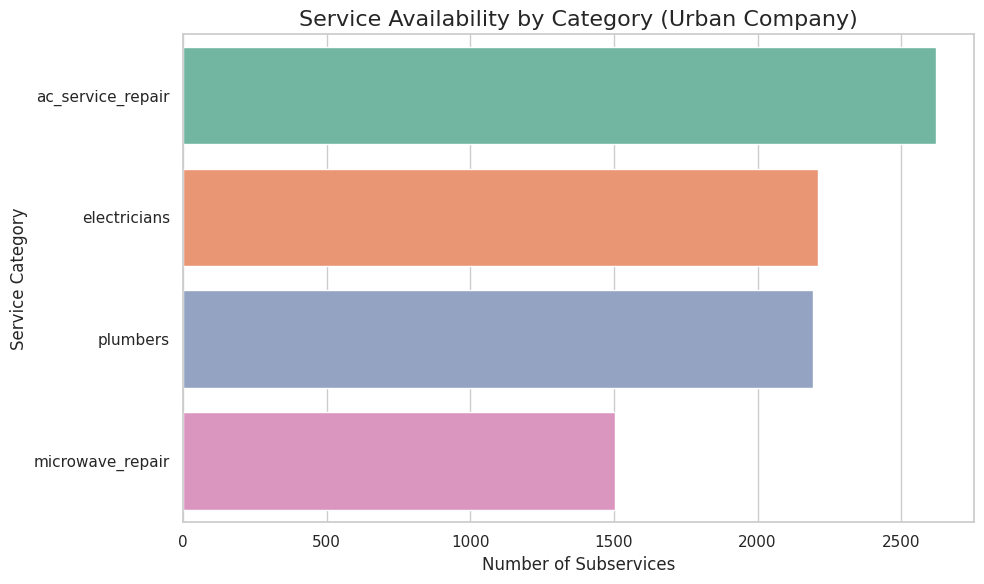

In [46]:
service_counts = uc_data['service'].value_counts().reset_index()
service_counts.columns = ['Service', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Service', data=service_counts, palette='Set2')
plt.title('Service Availability by Category (Urban Company)', fontsize=16)
plt.xlabel('Number of Subservices', fontsize=12)
plt.ylabel('Service Category', fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
uc_data[(uc_data["service"] == "electricians") & (uc_data["city_name"] == "pune")].head(10)

,service,subservice_name,subservice_charge,city_name,country_name,source,subservice_cleaned_charge
1696,electricians,AC switchbox installation,['₹369'],pune,India,UrbanCompany,369
1697,electricians,Switchboard installation,['₹279'],pune,India,UrbanCompany,279
1698,electricians,Switchboard repair,['₹110'],pune,India,UrbanCompany,110
1699,electricians,Switch/socket replacement,['₹109'],pune,India,UrbanCompany,109
1700,electricians,Fan Coil Repair,['₹449'],pune,India,UrbanCompany,449
1701,electricians,Ceiling fan regulator replacement,['₹99'],pune,India,UrbanCompany,99
1702,electricians,Decorative ceiling fan installation,['₹499'],pune,India,UrbanCompany,499
1703,electricians,Ceiling Fan Installation,['₹139'],pune,India,UrbanCompany,139
1704,electricians,Fan repair,['₹199'],pune,India,UrbanCompany,199
1705,electricians,Fan replacement,['₹239'],pune,India,UrbanCompany,239


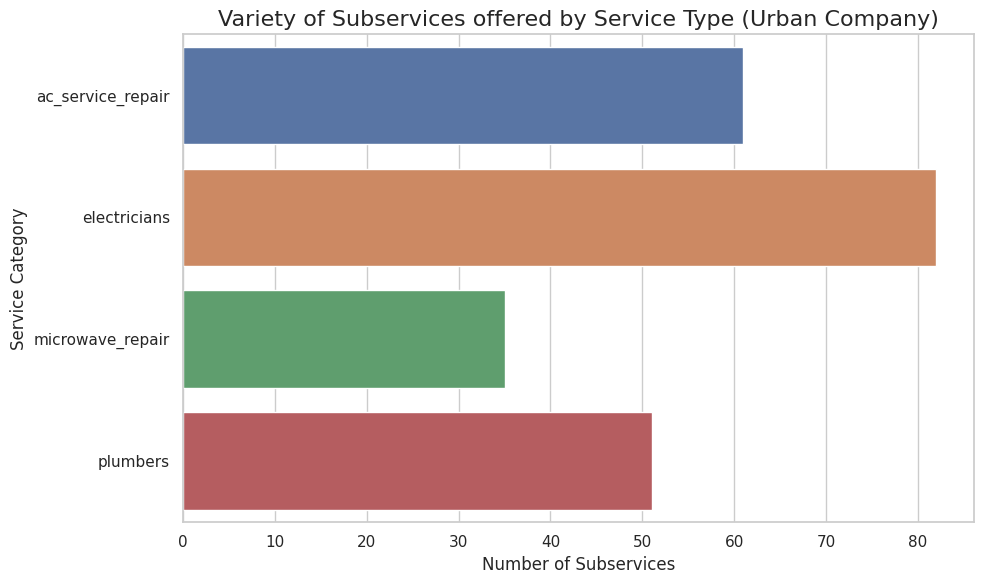

In [94]:
# calculating the number of subservices under each service category
service_variety = uc_data.groupby('service')['subservice_name'].nunique().reset_index()
service_variety.columns = ['Service', 'Number of Subservices']

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Subservices', y='Service', data=service_variety, hue="Service")
plt.title('Variety of Subservices offered by Service Type (Urban Company)', fontsize=16)
plt.xlabel('Number of Subservices', fontsize=12)
plt.ylabel('Service Category', fontsize=12)
plt.tight_layout()
plt.show()

In [35]:
import re

def extract_price(charge):
    prices = re.findall(r'\d+', charge)
    total = 0
    for price in prices:
      total += int(price)

    return total

In [36]:
uc_data['subservice_cleaned_charge'] = uc_data['subservice_charge'].apply(extract_price)
uc_data.sample(5)

,service,subservice_name,subservice_charge,city_name,country_name,source,subservice_cleaned_charge
1049,ac_service_repair,Adjust pipe and tight compressor screw,"['₹0', '₹349 (Labour)']",hyderabad,India,UrbanCompany,349
2303,electricians,Ceiling Fan Installation,['₹129'],vadodara,India,UrbanCompany,129
1977,plumbers,Overhead tank installation (500L-2000L),['₹1199'],nagpur,India,UrbanCompany,1199
3167,ac_service_repair,Compressor 0.8-1 ton,['₹6500'],surat,India,UrbanCompany,6500
962,plumbers,Tap replacement,['₹119'],udaipur,India,UrbanCompany,119


In [43]:
avg_price_per_service = uc_data.groupby('service')['subservice_cleaned_charge'].mean().reset_index()
avg_price_per_service.columns = ['Service', 'Average Charge (₹)']
avg_price_per_service['Average Charge (₹)'] = avg_price_per_service['Average Charge (₹)'].astype(int)
avg_price_per_service

,Service,Average Charge (₹)
0,ac_service_repair,1517
1,electricians,231
2,microwave_repair,1028
3,plumbers,500


<ipython-input-38-5331292626b1>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




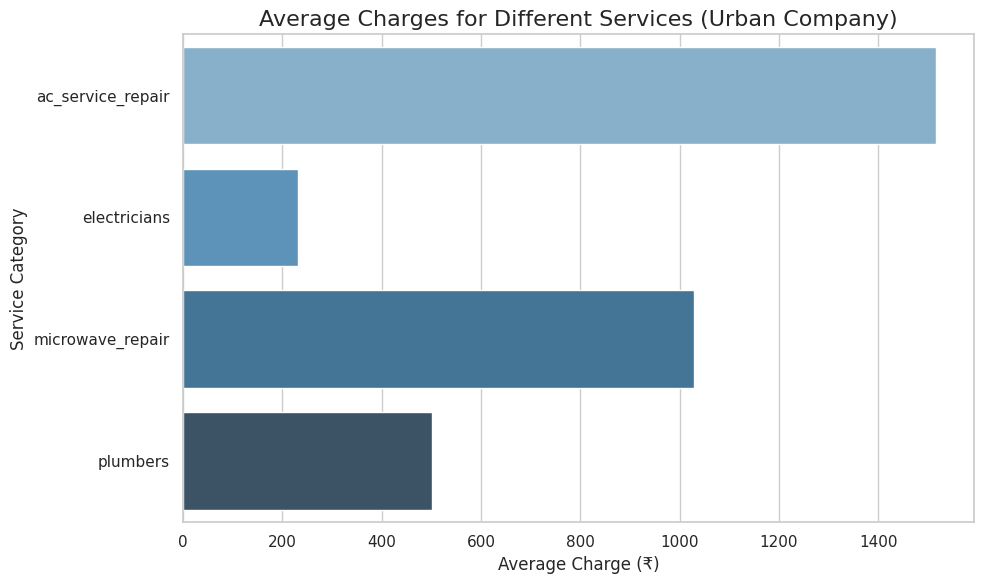

In [38]:
sns.set(style="whitegrid")

# barplot for the average charges by service
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Charge (₹)', y='Service', data=avg_price_per_service, palette='Blues_d')
plt.title('Average Charges for Different Services (Urban Company)', fontsize=16)
plt.xlabel('Average Charge (₹)', fontsize=12)
plt.ylabel('Service Category', fontsize=12)
plt.tight_layout()
plt.show()

In [89]:
# Group by subservice and calculate the average, minimum, and maximum charges
price_stats = uc_data.groupby('subservice_name')['subservice_cleaned_charge'].agg(['mean', 'min', 'max']).reset_index()
price_stats.columns = ['Subservice', 'Average Charge (₹)', 'Min Charge (₹)', 'Max Charge (₹)']
price_stats = price_stats.sort_values(by='Average Charge (₹)', ascending=True)
variable_price_services = price_stats[price_stats['Min Charge (₹)'] != price_stats['Max Charge (₹)']]
variable_price_services["price_difference"] = variable_price_services['Max Charge (₹)'] - variable_price_services['Min Charge (₹)']
variable_price_services = variable_price_services.sort_values('price_difference', ascending=False).head(15)
variable_price_services.sample(5)

<ipython-input-89-34ee9f18c54f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Subservice,Average Charge (₹),Min Charge (₹),Max Charge (₹),price_difference
190,TV installation (above 48 inches),579.878049,349,750,401
123,Magnetron 6 Fins,2012.953488,1899,2549,650
78,Floor mounted western toilet replacement,1615.139535,839,1799,960
225,Western toilet repair (floor mounted),663.418605,199,799,600
175,Split AC Installation,1871.093023,1499,1999,500


In [93]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=variable_price_services['Subservice'],
    y=variable_price_services['Min Charge (₹)'],
    name='Min Charge (₹)',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=variable_price_services['Subservice'],
    y=variable_price_services['Max Charge (₹)'],
    name='Max Charge (₹)',
    marker_color='lightsalmon'
))

fig.update_layout(
    title='Min vs Max Price Differences for Selected Subservices (Urban Company)',
    xaxis_title='Subservice',
    yaxis_title='Charge (₹)',
    barmode='group',
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    showlegend=True
)

fig.show()

<ipython-input-48-5c682c498bbc>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




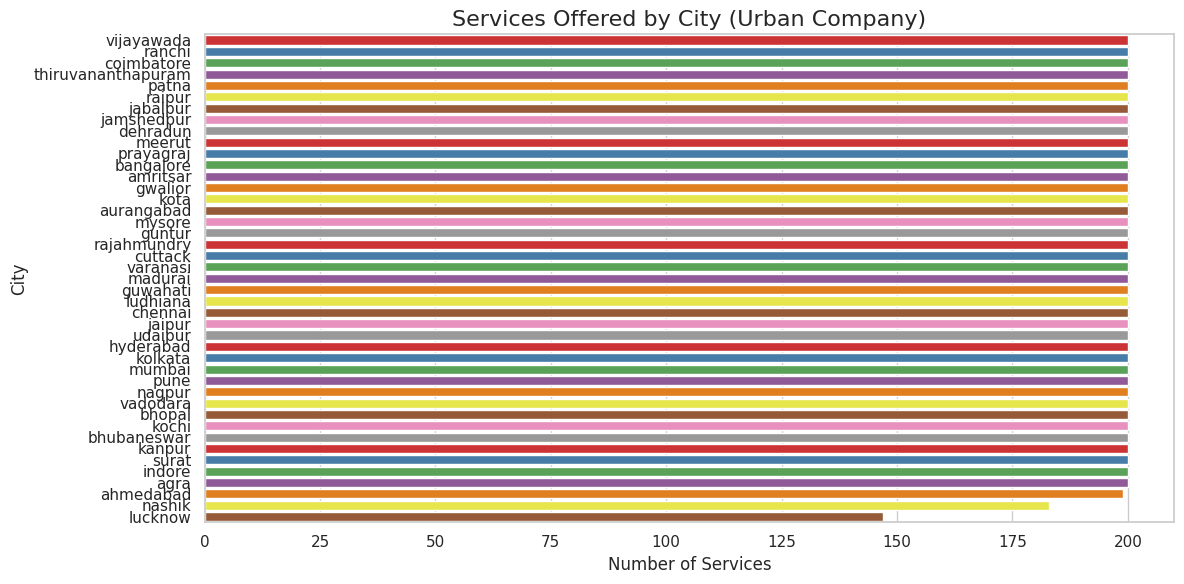

In [48]:
# group data by city and count the number of services offered in each city
city_service_counts = uc_data['city_name'].value_counts().reset_index()
city_service_counts.columns = ['City', 'Service Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Service Count', y='City', data=city_service_counts, palette='Set1')
plt.title('Services Offered by City (Urban Company)', fontsize=16)
plt.xlabel('Number of Services', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-58-a8aaf12982b0>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




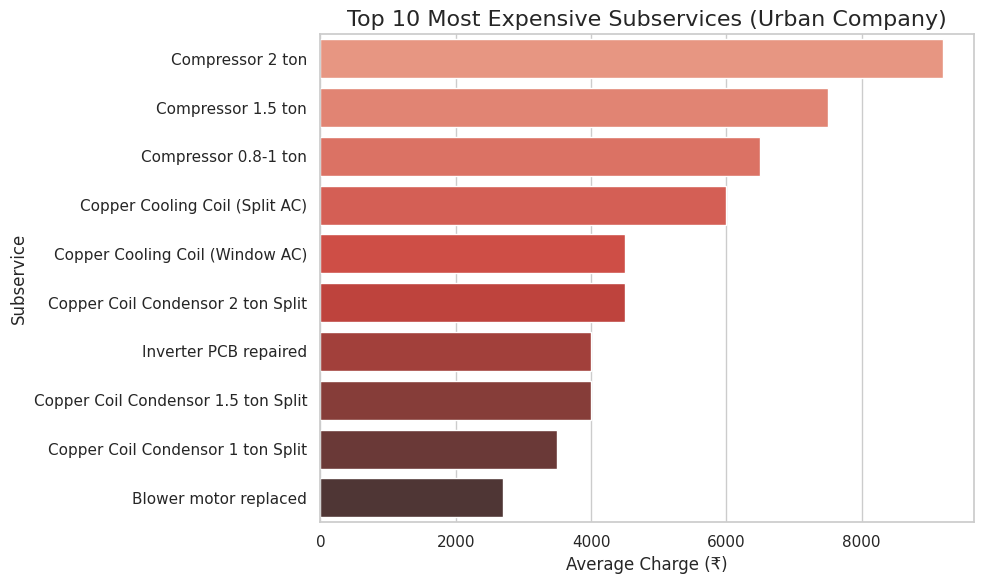

In [58]:
# Plot the top 10 most expensive subservices to highlight potential price advantage
top_10_expensive = price_stats.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Average Charge (₹)', y='Subservice', data=top_10_expensive, palette='Reds_d')

# Add title and labels
plt.title('Top 10 Most Expensive Subservices (Urban Company)', fontsize=16)
plt.xlabel('Average Charge (₹)', fontsize=12)
plt.ylabel('Subservice', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
